In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('2d-em.csv', header=None)

In [6]:
data = df.as_matrix()

In [15]:
data.shape

(3000, 2)

In [9]:
x = data[:,0]
y = data[:,1]

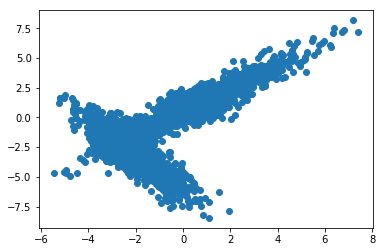

In [10]:
plt.scatter(x,y)

In [36]:
def get_xy(data):
    x = data[:,0]
    y = data[:,1]
    return x,y

In [27]:
dist_array = np.zeros((2,3000))
dist = np.random.choice(100,(1,3000))
dist_array[1,:] = dist
dist_array

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [ 94.,  85.,   7., ...,  17.,  45.,  55.]])

In [37]:
class em_cluster():
    def fit(self, k, X, num_iteration, measure = 'M'):
        # initialize covariance matrix dictionary and mean dictionary
        # for each cluster there will be one covariance matrix and one mean stored
        # in these two dictionaries
        self.covmatrix_dict = {}
        
        for i in range(k):
            self.covmatrix_dict[i] = np.identity(X.shape[1])
        
        
        self.mean_dict = {}
        for i in range(k):
            index = np.random.choice(X.shape[0])
            self.mean_dict[i] = X[index]
            
        if measure == 'M':
            #self.norm_lst = []
            for num in range(num_iteration):
                dist_array = np.zeros((k, X.shape[0]))
                for i in self.covmatrix_dict:
                    distance = ((X - self.mean_dict[i]).dot(np.linalg.inv(self.covmatrix_dict[i]))).dot((X-self.mean_dict[i]).T)
                    dist_array[i,:] = np.diag(distance)                
                
                cluster_lst = np.argmin(dist_array, axis = 0)
                
                #sum_norm = 0
                for i in range(k):
                    self.covmatrix_dict[i] = np.cov(X[cluster_lst == i], rowvar=False)
                    self.mean_dict[i] = np.mean(X[cluster_lst == i], axis = 0)
                    #sum_norm += np.linalg.norm(self.covmatrix_dict[i])
                #self.norm_lst.append(sum_norm)
            
        self.result = cluster_lst

In [38]:
cluster = em_cluster()

In [39]:
k_lst = [2,3,4]
n = 15

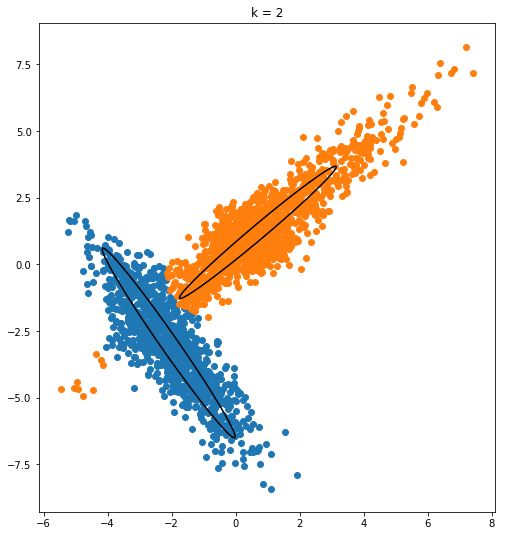

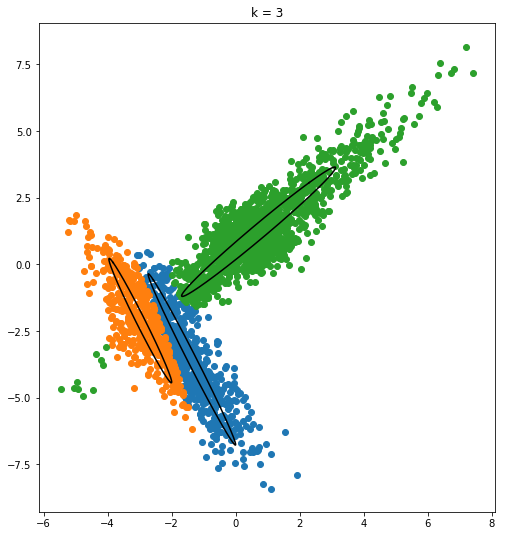

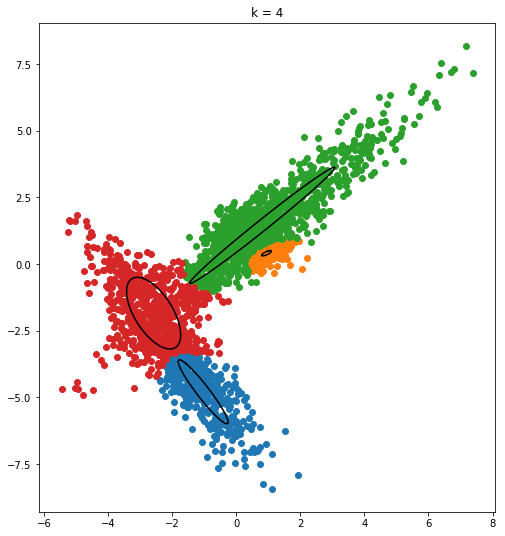

In [40]:
for k in k_lst:
    plt.figure(k)
    plt.figure(figsize=(18,9))
    
    cluster.fit(k, data, num_iteration=n)
    
    sub_image = 1
    plt.subplot(1,2,sub_image)
    
    for type_cluster in np.unique(cluster.result):
        x,y = get_xy(data[cluster.result == type_cluster])
        plt.title("k = " + str(k))
        plt.scatter(x, y)
        
        num_points = 1000
        radius = 1
        arcs = np.linspace(0, 2 * np.pi, num_points)
        cx = radius * np.sin(arcs) 
        cy = radius * np.cos(arcs)
        
        xy = np.array(zip(cx, cy))

        cx, cy = zip(*xy.dot(cluster.covmatrix_dict[type_cluster]))
        plt.plot(cx + cluster.mean_dict[type_cluster][0], cy+cluster.mean_dict[type_cluster][1], color = 'black')

    sub_image += 1
    
    #plt.subplot(1,2,sub_image)
    #plt.plot(range(n), cluster.norm_lst)

In [41]:
import matplotlib.image as mpimg
path = './test.jpg'

In [42]:
img = mpimg.imread(path)

In [43]:
def show_img(img):
    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    plt.show()

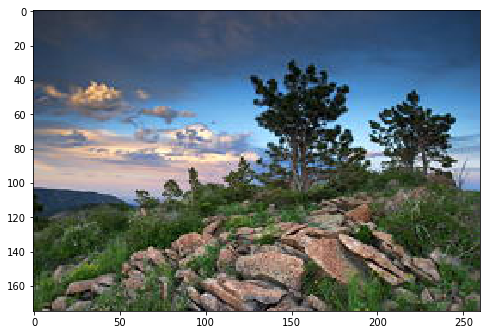

In [44]:
show_img(img)

In [45]:
rows = img.shape[0]
cols = img.shape[1]
img = img.reshape(img.shape[0] * img.shape[1], 3)

In [50]:
k =10
img_cluster = em_cluster()
img_cluster.fit(k, img, num_iteration = 1)

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/numpy/lib/function_base.py:1110: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: Degrees of freedom <= 0 for slice
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/numpy/lib/function_base.py:3093: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/numpy/lib/function_base.py:3093: RuntimeWarning: invalid value encountered in multiply
  c *= 1. / np.float64(fact)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/s

In [51]:
test_img = img

In [52]:
for type_cluster in np.unique(img_cluster.result):
    test_img[img_cluster.result == type_cluster] = img_cluster.mean_dict[type_cluster]

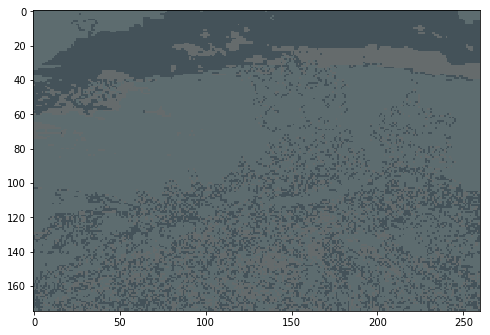

In [53]:
plt.figure
plt.figure(figsize=(8,8))
show_img(test_img.reshape(175, 260,3 ))